# Body brain weights outliers

## Exercise: Load an plot the data

> **Exercise**: Load the data set into a `data_df` DataFrame. Load the `body` and `brain` columns into x/y Numpy arrays. Apply the Numpy `log()` function to both variables, store the result in a `x_log` and a `y_log` variable, and plot them.

**Self-assessment**: You should get a result similar to this one.

<img src="figures/body-brain-plot.png" width="350px" />

In [5]:
import pandas as pd
import numpy as np
# Load data
data_df = pd.read_csv('data/brain-and-body-weights.csv')
x = data_df['body']
y = data_df['brain']

# Rescale them
x_log = np.log(x)
y_log = np.log(y)

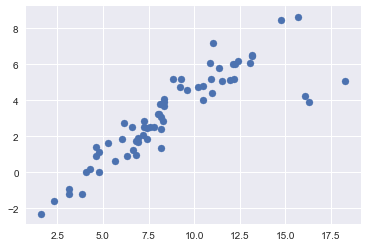

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Activate Seaborn style
sns.set()

# Get a few colors from the default color palette

# Plot the model
plt.scatter(x_log, y_log)
plt.show()

In [9]:
from sklearn.linear_model import SGDRegressor

In [11]:
lm_squared = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10000)

In [35]:
lm_squared2 = SGDRegressor(loss='squared_loss', penalty='none', max_iter=10000)

## Exercise: Filter outliers and fit a linear regression

> **Exercise**: (A) Fit a linear regression to `x_log` and `y_log`. (B) Filter the three outliers. (C) Fit another linear regression. (D) Visually compare the two models by plotting their prediction lines.

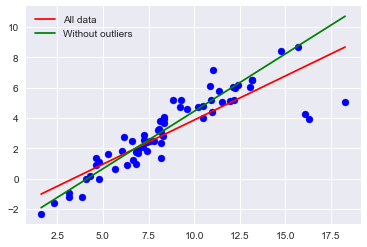

In [36]:
# (A) Fit a linear regression using all the data points
lm1 = lm_squared.fit(x_log.values.reshape(-1, 1),y_log)

# (B) Filter the three outliers
filter = ((x_log > 15) & (y_log < 6))
x_log_filtered = x_log[~filter]
y_log_filtered = y_log[~filter]

# (C) Fit a linear regression using the rest of the data points
lm2 = lm_squared2.fit(x_log_filtered.values.reshape(-1, 1),y_log_filtered)

x_vals = np.linspace(min(x_log), max(x_log), num=100)
y_val1 = lm1.predict(x_vals.reshape(-1,1))
y_val2 = lm2.predict(x_vals.reshape(-1,1))

# (D) Plot the two models
sns.set() # Activate Seaborn style
plt.scatter(x_log, y_log, color="blue", label=None)
plt.plot(x_vals, y_val1, c="red", label='All data')
plt.plot(x_vals, y_val2, c="green", label='Without outliers')
plt.legend()
plt.show()

## Exercise: Fit a linear regression using Huber loss

> **Exercise**: Fit a linear regression to `x_log` and `y_log` using Huber loss. Plot the prediction line.

**Self-assessment**: You should get a result close to the linear regression without outliers.

C:\Users\eric\Anaconda2\envs\exts-aml1\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


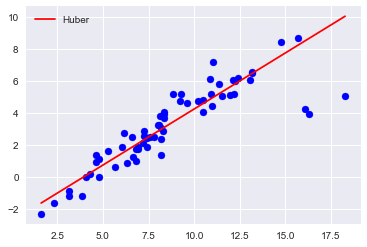

In [42]:
# Fit a linear regression using Huber loss
lm_huber = SGDRegressor(loss='huber', penalty='none', epsilon=1, max_iter=10000)
lm3 = lm_huber.fit(x_log.reshape(-1,1),y_log)
y_val3 = lm3.predict(x_vals.reshape(-1,1))

# Plot the prediction line
sns.set() # Activate Seaborn style
plt.scatter(x_log, y_log, color="blue", label=None)
plt.plot(x_vals, y_val3, c="red", label='Huber')
plt.legend()
plt.show()

In [63]:
lm_huber.coef_

array([ 0.69963766])

In [64]:
lm_huber.intercept_

array([-2.76578863])

## Exercise: Comptue the *Encephalization Quotient (EQ)*

We saw that the equation of a simple linear regression $y=ax+b$ is equivalent to $y=cx^{a}$ where $c=e^{b}$ when $x$ and $y$ are on a logarithmic scale. In our example, we can use this equation to calculate the **Encephalization Quotient (EQ)**.

The idea is to compute estimations of brain weights for each data point using $\hat{y}=cx^{a}$ and compare them to the actual brain weight. The EQ coefficient is defined as

$$
\text{EQ}=\frac{y}{\hat{y}}
$$

> **Exercise**: (A) Create the `a` and `c` values using the coefficients of the linear regression model without outliers. (B) Compute the estimated brain weights $\hat{y}$. (C) Compute the EQ values and add them to the `data_df` DataFrame. (D) Print the five rows with the largest quotients.

**Self-assessment**: You should see humans and monkeys in the first places - humans with an EQ around 7.

In [65]:
import math

# (A) Create a and c values
a = lm_squared2.coef_
c = np.exp(lm_squared2.intercept_)

# (B) Compute predicted brain weights
y_pred = c * x**a

# (C) Compute EQ
data_df['EQ'] = y / y_pred

# (D) Print the five largest quotients
data_df.sort_values(by=['EQ'], axis=0, ascending=False,inplace=True)
data_df.head()

,body,brain,label,EQ
49,62000.0,1320.0,Human,7.139355
39,6800.0,179.0,Rhesus monkey,5.149676
41,10550.0,179.5,Baboon,3.704720
14,480.0,15.5,Owl monkey,3.309950
7,101.0,4.0,Ground squirrel,2.776012
